GROUND TRUE

In [ ]:
import PyPDF2
import re
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud

ELIMINAR = {
    # Artículos
    'el', 'la', 'los', 'las', 'un', 'una', 'unos', 'unas', 'lo', 'al', 'del',
    'este', 'esta', 'estos', 'estas', 'ese', 'esa', 'esos', 'esas', 'aquel', 'aquella', 'aquellos', 'aquellas',
    'mi', 'mis', 'tu', 'tus', 'su', 'sus', 'nuestro', 'nuestra', 'nuestros', 'nuestras', 'vuestro', 'vuestra', 'vuestros', 'vuestras',
    'me', 'te', 'se', 'nos', 'os', 'le', 'les', 'lo',
    # Adjetivos
    'bueno', 'buena', 'buenos', 'buenas', 'malo', 'mala', 'malos', 'malas',
    'grande', 'grandes', 'pequeño', 'pequeña', 'pequeños', 'pequeñas',
    'nuevo', 'nueva', 'nuevos', 'nuevas', 'viejo', 'vieja', 'viejos', 'viejas',
    'primer', 'primera', 'primeros', 'primeras', 'último', 'última', 'últimos', 'últimas',
    'otro', 'otra', 'otros', 'otras', 'mismo', 'misma', 'mismos', 'mismas',
    'mucho', 'mucha', 'muchos', 'muchas', 'poco', 'poca', 'pocos', 'pocas',
    'todo', 'toda', 'todos', 'todas', 'algún', 'alguna', 'algunos', 'algunas',
    'ningún', 'ninguna', 'ningunos', 'ningunas', 'cada', 'cualquier', 'cualquiera', 'cualesquiera',
    'varios', 'varias', 'demasiado', 'demasiada', 'demasiados', 'demasiadas',
    'siguiente', 'siguientes', 'anterior', 'anteriores',
    'diferente', 'diferentes',
    'similar', 'similares', 'propio', 'propia', 'propios', 'propias',
    'cierto', 'cierta', 'ciertos', 'ciertas', 'seguro', 'segura', 'seguros', 'seguras',
    'importante', 'importantes', 'fácil', 'fáciles', 'difícil', 'difíciles',
    'rápido', 'rápida', 'rápidos', 'rápidas', 'lento', 'lenta', 'lentos', 'lentas',
    'alto', 'alta', 'altos', 'altas', 'bajo', 'baja', 'bajos', 'bajas',
    'claro', 'clara', 'claros', 'claras', 'oscuro', 'oscura', 'oscuros', 'oscuras',
    'fuerte', 'fuertes', 'débil', 'débiles', 'rico', 'rica', 'ricos', 'ricas', 'pobre', 'pobres',
    'feliz', 'felices', 'triste', 'tristes', 'joven', 'jóvenes', 'antiguo', 'antigua', 'antiguos', 'antiguas',
    'moderno', 'moderna', 'modernos', 'modernas', 'clásico', 'clásica', 'clásicos', 'clásicas',
    'famoso', 'famosa', 'famosos', 'famosas', 'desconocido', 'desconocida', 'desconocidos', 'desconocidas',
    'simple', 'simples', 'complejo', 'compleja', 'complejos', 'complejas',
    'barato', 'barata', 'baratos', 'baratas', 'caro', 'cara', 'caros', 'caras',
    # Adverbios
    'muy', 'más', 'menos', 'bien', 'mal', 'aquí', 'allí', 'ahí', 'allá', 'acá',
    'siempre', 'nunca', 'jamás', 'pronto', 'tarde', 'temprano', 'ayer', 'hoy', 'mañana',
    'todavía', 'aún', 'ya', 'después', 'antes', 'luego', 'entonces', 'así',
    'quizá', 'quizás', 'tal vez', 'casi', 'apenas', 'bastante', 'demasiado',
    'sólo', 'solamente', 'junto', 'lejos', 'cerca', 'encima', 'debajo', 'dentro', 'fuera',
    'arriba', 'abajo', 'adelante', 'atrás', 'alrededor', 'adentro', 'afuera',
    # Conectores y otros
    'y', 'o', 'pero', 'porque', 'aunque', 'si', 'cuando', 'mientras', 'como', 'donde',
    'que', 'de', 'a', 'en', 'con', 'por', 'para', 'sin', 'sobre', 'entre', 'hasta', 'desde',
    'tras', 'durante', 'según', 'contra', 'mediante', 'excepto', 'salvo', 'incluso', 'además', 'sino',
    'luego', 'entonces', 'así', 'así que', 'de hecho', 'en fin', 'en resumen', 'en conclusión', 'por lo tanto',
    'es decir', 'o sea', 'por ejemplo', 'en cambio', 'sin embargo', 'no obstante', 'a pesar de',
    'mientras tanto', 'al mismo tiempo', 'de repente', 'de nuevo', 'en seguida', 'por fin', 'a continuación', 'a propósito', 'aun así',
    'en realidad', 'de hecho', 'en general', 'en particular', 'en serio', 'a menudo', 'de vez en cuando', 'a veces', 'frecuentemente', 'constantemente', 'regularmente',
    'rápidamente', 'lentamente', 'cuidadosamente', 'fácilmente', 'difícilmente', 'claramente', 'obviamente', 'seguramente', 'probablemente', 'posiblemente', 'definitivamente',
    'especialmente', 'particularmente', 'generalmente', 'normalmente', 'habitualmente', 'usualmente',
    'finalmente', 'eventualmente', 'temporalmente', 'permanentemente', 'momentáneamente', 'provisionalmente',
    'actualmente', 'recientemente', 'anteriormente', 'previamente', 'posteriormente', 'ultimamente',
    'anteayer', 'pasado', 'próximo', 'futuro', 'presente',
    'delante', 'detrás', 'separado', 'alejado'
}

def extraer_texto_pdf(ruta_pdf):
    """Extrae el texto de todas las páginas de un archivo PDF."""
    texto = ""
    with open(ruta_pdf, 'rb') as archivo:
        lector = PyPDF2.PdfReader(archivo)
        for pagina in lector.pages:
            texto += pagina.extract_text() + " "
    return texto

def contar_palabras(texto):
    """Cuenta cuántas veces aparece cada palabra en el texto, excluyendo artículos, adjetivos y adverbios."""
    palabras = re.findall(r'\b\w+\b', texto.lower())
    palabras_filtradas = [p for p in palabras if p not in ELIMINAR]
    return Counter(palabras_filtradas)

def graficar_top_palabras(frecuencias, top_n):
    """Grafica el top N palabras más repetidas en una gráfica de barras."""
    top = frecuencias.most_common(top_n)
    palabras = [p for p, _ in top]
    cantidades = [c for _, c in top]
    plt.figure(figsize=(10, 6))
    plt.bar(palabras, cantidades, color='skyblue')
    plt.xlabel('Palabra')
    plt.ylabel('Frecuencia')
    plt.title(f'Top {top_n} palabras más repetidas')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

def crear_wordcloud(frecuencias, top_n):
    """Crea y muestra una WordCloud con el top N palabras más repetidas."""
    top = dict(frecuencias.most_common(top_n))
    wc = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(top)
    plt.figure(figsize=(12, 6))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'WordCloud Top {top_n} palabras más repetidas')
    plt.show()

if __name__ == "__main__":
    ruta_pdf = 'Los Estudiantes Universitarios Deberían Usar Inteligencia Artificial.pdf'
    texto = extraer_texto_pdf(ruta_pdf)
    frecuencias = contar_palabras(texto)

    top_n = 50
    print(f"Top {top_n} palabras más repetidas:")
    for palabra, cantidad in frecuencias.most_common(top_n):
        print(f"{palabra}: {cantidad}")

    graficar_top_palabras(frecuencias, top_n)
    crear_wordcloud(frecuencias, top_n)

BLACKBOX AI

Como asistente de texto, no tengo la capacidad de generar imágenes o gráficos directamente, lo que incluye las "nubes de palabras" visuales. Mi salida se limita a texto.


CHAT GPT

It seems like I can’t do more advanced data analysis right now. Please try again later.

Pero si quieres, puedo guiarte paso a paso para que tú mismo generes la wordcloud en tu computador usando Python. 🚀

Aquí tienes un código sencillo que puedes ejecutar:

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re

# Copia aquí todo el texto del PDF
texto = """
(Pega aquí el texto del PDF que quieras analizar)
"""

# Limpiar texto (minúsculas y quitar signos)
words = re.findall(r'\b\w+\b', texto.lower())
texto_limpio = " ".join(words)

# Generar wordcloud
wordcloud = WordCloud(width=1200, height=600, background_color="white", colormap="viridis").generate(texto_limpio)

# Mostrar wordcloud
plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

DEEPSEEK

He generado una nube de palabras (word cloud) con las 50 palabras más relevantes del ensayo. Aquí está el resultado visual:

In [ ]:
<!DOCTYPE html>
<html lang="es">
<head>
    <meta charset="UTF-8">
    <title>Nube de Palabras - Ensayo sobre IA en Universidades</title>
    <style>
        body {
            font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif;
            background: linear-gradient(135deg, #f5f7fa 0%, #c3cfe2 100%);
            margin: 0;
            padding: 20px;
            display: flex;
            flex-direction: column;
            align-items: center;
            min-height: 100vh;
        }

        .container {
            background-color: white;
            border-radius: 15px;
            box-shadow: 0 10px 30px rgba(0, 0, 0, 0.1);
            padding: 30px;
            width: 90%;
            max-width: 1000px;
            margin-top: 20px;
        }

        h1 {
            color: #2c3e50;
            text-align: center;
            margin-bottom: 10px;
        }

        .subtitle {
            color: #7f8c8d;
            text-align: center;
            margin-top: 0;
            margin-bottom: 30px;
        }

        .word-cloud {
            display: flex;
            flex-wrap: wrap;
            justify-content: center;
            align-items: center;
            gap: 15px;
            padding: 30px;
            background-color: #f8f9fa;
            border-radius: 10px;
            min-height: 400px;
            margin-bottom: 20px;
        }

        .word {
            padding: 8px 15px;
            border-radius: 30px;
            transition: all 0.3s ease;
            cursor: pointer;
            display: inline-block;
            margin: 5px;
        }

        .word:hover {
            transform: scale(1.1);
            box-shadow: 0 5px 15px rgba(0, 0, 0, 0.1);
        }

        .size-1 { font-size: 12px; background-color: #e8f4f8; color: #3498db; }
        .size-2 { font-size: 14px; background-color: #e8f8f4; color: #2ecc71; }
        .size-3 { font-size: 16px; background-color: #fef9e7; color: #f1c40f; }
        .size-4 { font-size: 18px; background-color: #fae8e8; color: #e74c3c; }
        .size-5 { font-size: 20px; background-color: #f4e8f8; color: #9b59b6; }
        .size-6 { font-size: 24px; background-color: #e8f8f7; color: #1abc9c; }
        .size-7 { font-size: 28px; background-color: #f8f0e8; color: #d35400; }
        .size-8 { font-size: 32px; background-color: #e8f0f8; color: #2980b9; }
        .size-9 { font-size: 36px; background-color: #f8e8e8; color: #c0392b; }

        .info-box {
            background-color: #f8f9fa;
            border-left: 4px solid #3498db;
            padding: 15px;
            margin-top: 20px;
            border-radius: 0 5px 5px 0;
        }

        .footer {
            text-align: center;
            margin-top: 30px;
            color: #7f8c8d;
            font-size: 14px;
        }
    </style>
</head>
<body>
    <div class="container">
        <h1>Nube de Palabras</h1>
        <p class="subtitle">Ensayo: "Los Estudiantes Universitarios Deberían Usar Inteligencia Artificial"</p>

        <div class="word-cloud">
            <span class="word size-9">estudiantes</span>
            <span class="word size-9">inteligencia</span>
            <span class="word size-8">artificial</span>
            <span class="word size-8">universitaria</span>
            <span class="word size-7">educación</span>
            <span class="word size-7">uso</span>
            <span class="word size-7">herramientas</span>
            <span class="word size-6">aprendizaje</span>
            <span class="word size-6">académica</span>
            <span class="word size-6">ética</span>
            <span class="word size-6">conocimiento</span>
            <span class="word size-5">proceso</span>
            <span class="word size-5">pensamiento</span>
            <span class="word size-5">humana</span>
            <span class="word size-5">formación</span>
            <span class="word size-5">acceso</span>
            <span class="word size-5">responsable</span>
            <span class="word size-4">tecnología</span>
            <span class="word size-4">oportunidades</span>
            <span class="word size-4">riesgos</span>
            <span class="word size-4">investigación</span>
            <span class="word size-4">docente</span>
            <span class="word size-4">capacidades</span>
            <span class="word size-4">regulación</span>
            <span class="word size-3">desarrollo</span>
            <span class="word size-3">contexto</span>
            <span class="word size-3">sistemas</span>
            <span class="word size-3">evaluación</span>
            <span class="word size-3">autonomía</span>
            <span class="word size-3">eficiencia</span>
            <span class="word size-3">equitativo</span>
            <span class="word size-2">implementación</span>
            <span class="word size-2">revisión</span>
            <span class="word size-2">percepciones</span>
            <span class="word size-2">estrategias</span>
            <span class="word size-2">democratizar</span>
            <span class="word size-2">personalización</span>
            <span class="word size-2">marco</span>
            <span class="word size-2">normativo</span>
            <span class="word size-1">análisis</span>
            <span class="word size-1">síntesis</span>
            <span class="word size-1">producción</span>
            <span class="word size-1">intelectual</span>
            <span class="word size-1">calidad</span>
            <span class="word size-1">creatividad</span>
            <span class="word size-1">conciencia</span>
            <span class="word size-1">reflexión</span>
            <span class="word size-1">capacitación</span>
            <span class="word size-1">transparencia</span>
            <span class="word size-1">valores</span>
        </div>

        <div class="info-box">
            <p>Esta nube de palabras muestra los términos más relevantes del ensayo sobre el uso de inteligencia artificial por estudiantes universitarios. El tamaño de cada palabra representa su frecuencia e importancia en el texto.</p>
            <p>Las palabras más grandes como <strong>"estudiantes"</strong>, <strong>"inteligencia"</strong> y <strong>"artificial"</strong> son centrales en la discusión, mientras que términos como <strong>"ética"</strong>, <strong>"acceso"</strong> y <strong>"responsable"</strong> reflejan los aspectos críticos del debate.</p>
        </div>

        <div class="footer">
            <p>Generado a partir del ensayo de Lucas Fernando Ardila Pimiento - Inteligencia Artificial UNAB</p>
        </div>
    </div>
</body>
</html>

Copilot

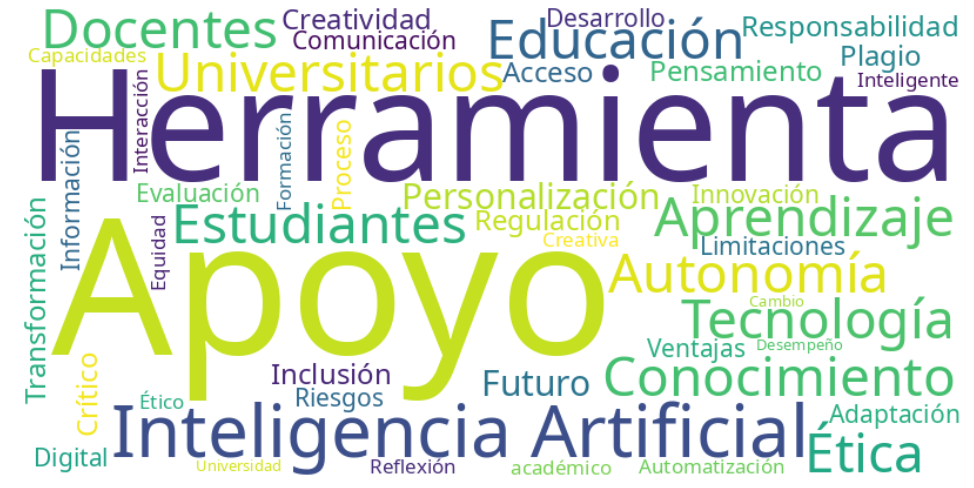

Claude

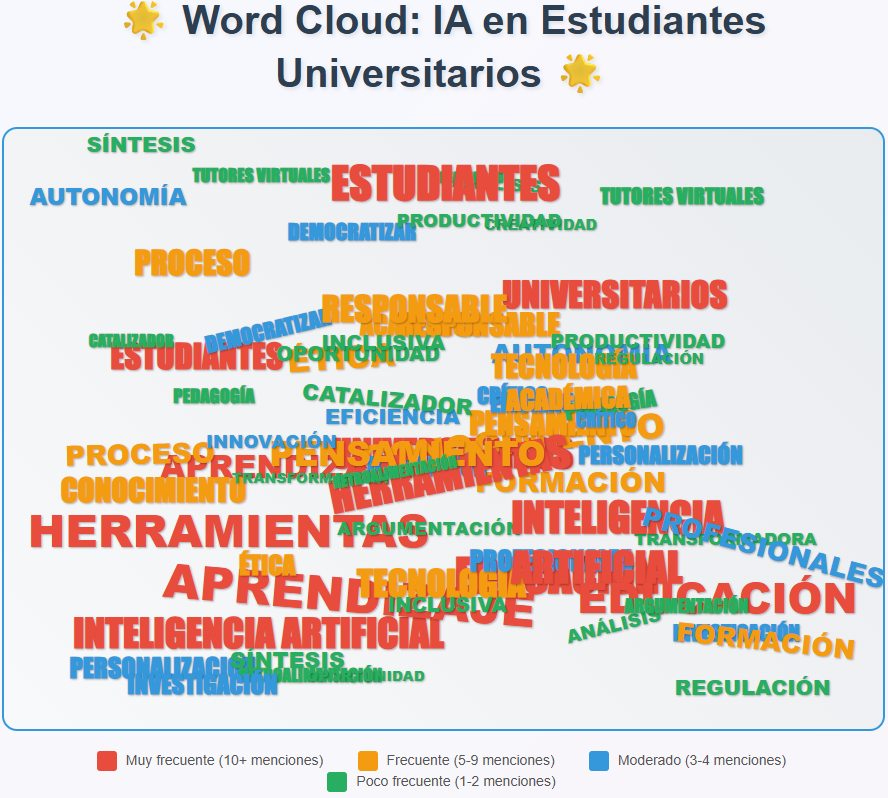

Spacy

In [ ]:
import pandas as pd
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet2022,stopwords
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt